🔹 Original Data:
     ID     Name Age JoiningDate Salary
0  101    Alice  25  2022-01-10  50000
1  102      Bob  30  2022-03-15  60000
2  103  Charlie  35  2022-03-15  70000
3  104    David  40  2022-05-20  80000
4  105      Eve  45  2022-07-25  90000
5  105      Eve  45  2022-07-25  90000

🔎 Duplicate Rows Found: 1

✅ After Removing Duplicates:
     ID     Name Age JoiningDate Salary
0  101    Alice  25  2022-01-10  50000
1  102      Bob  30  2022-03-15  60000
2  103  Charlie  35  2022-03-15  70000
3  104    David  40  2022-05-20  80000
4  105      Eve  45  2022-07-25  90000

📌 Data Types Before Fixing:
 ID              int64
Name           object
Age            object
JoiningDate    object
Salary         object
dtype: object

✅ Data Types After Fixing:
 ID                      int64
Name                   object
Age                     int64
JoiningDate    datetime64[ns]
Salary                  int64
dtype: object


/tmp/ipykernel_4667/3653848566.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
/tmp/ipykernel_4667/3653848566.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Salary'] = pd.to_numeric(df_cleaned['Salary'], errors='coerce')
/tmp/ipykernel_4667/3653848566.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

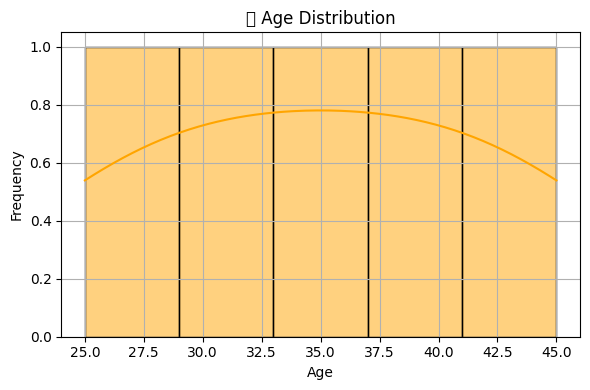

/tmp/ipykernel_4667/3653848566.py:67: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/vscode/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


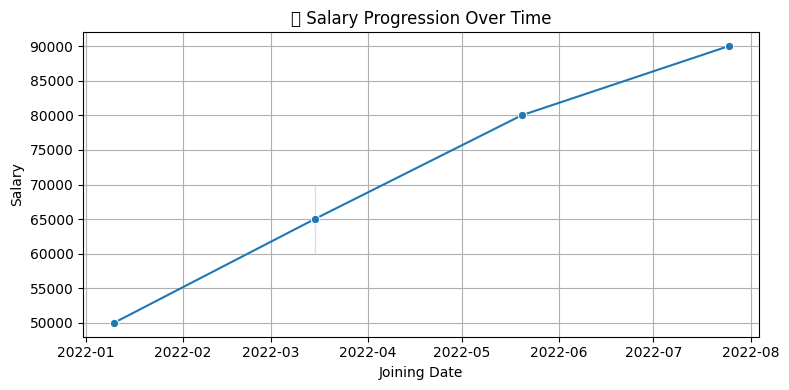


📋 Summary Report:
Total Rows Before Cleaning: 6
Rows After Duplicate Removal: 5
Missing Values After Type Fix:
 ID             0
Name           0
Age            0
JoiningDate    0
Salary         0
dtype: int64


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------------------
# Step 1: Create Simulated Extended Data
# --------------------------------------
data = {
    'ID': [101, 102, 103, 104, 105, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Eve'],
    'Age': ['25', '30', '35', '40', '45', '45'],         # Age as string (wrong type)
    'JoiningDate': ['2022-01-10', '2022-03-15', '2022-03-15', '2022-05-20', '2022-07-25', '2022-07-25'],
    'Salary': ['50000', '60000', '70000', '80000', '90000', '90000']  # Salary as string (wrong type)
}

df = pd.DataFrame(data)
print("🔹 Original Data:\n", df)

# --------------------------------------
# Step 2: Detect & Remove Duplicates
# --------------------------------------
print("\n🔎 Duplicate Rows Found:", df.duplicated().sum())

# Remove full duplicate rows
df_cleaned = df.drop_duplicates()

# Optional: Remove duplicates based on subset of columns (e.g., ID or Name)
# df_cleaned = df.drop_duplicates(subset=['ID'])

print("\n✅ After Removing Duplicates:\n", df_cleaned)

# --------------------------------------
# Step 3: Fix Incorrect Data Types
# --------------------------------------
print("\n📌 Data Types Before Fixing:\n", df_cleaned.dtypes)

# Convert Age and Salary to numeric
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'], errors='coerce')
df_cleaned['Salary'] = pd.to_numeric(df_cleaned['Salary'], errors='coerce')

# Convert JoiningDate to datetime
df_cleaned['JoiningDate'] = pd.to_datetime(df_cleaned['JoiningDate'], errors='coerce')

print("\n✅ Data Types After Fixing:\n", df_cleaned.dtypes)

# --------------------------------------
# Step 4: Visualizations for Analysis
# --------------------------------------

# Plot 1: Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned['Age'], bins=5, kde=True, color='orange')
plt.title("📊 Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Salary Over Time
plt.figure(figsize=(8, 4))
sns.lineplot(x='JoiningDate', y='Salary', data=df_cleaned, marker='o')
plt.title("📈 Salary Progression Over Time")
plt.xlabel("Joining Date")
plt.ylabel("Salary")
plt.tight_layout()
plt.grid(True)
plt.show()

# --------------------------------------
# Step 5: Summary Report
# --------------------------------------
print("\n📋 Summary Report:")
print(f"Total Rows Before Cleaning: {len(df)}")
print(f"Rows After Duplicate Removal: {len(df_cleaned)}")
print("Missing Values After Type Fix:\n", df_cleaned.isnull().sum())

# Optional: Export cleaned data if needed
# df_cleaned.to_csv("cleaned_data.csv", index=False)